In [1]:
import sys
sys.path.append("../..")
from IPython.display import display
%matplotlib inline

In [56]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from magine.networks.utils import subtract_network_from_network
from magine.networks.subgraphs import Subgraph
from magine.networks.visualization.notebooks.view import display_graph

In [3]:
ecn = nx.read_gml('canonical_kegg_hmdb_biogrid_reactome_signor.gml')
ddn = nx.read_gpickle('Data/cisplatin_based_network.p')

In [4]:
subtracted_net = subtract_network_from_network(ddn, ecn)

nx.write_gml(subtracted_net, 'subtracted_network.gml')

In [5]:
tmp_g = subtracted_net.to_undirected()
sorted_graphs = sorted(nx.connected_component_subgraphs(tmp_g), key=len,
                       reverse=True)
node_list = []
group_to_nodes = dict()
counter = 0
for i in sorted_graphs:
    n_nodes = len(i.nodes)
    node_list.append(n_nodes)
    sig_hit = 0
    measured_hit = 0
    if n_nodes < 2:
        subtracted_net.remove_nodes_from(i.nodes)
        continue
    for node, data in i.nodes(data=True):
        if data['sigMeasured'] == 'red':
            sig_hit += 1
        if data['measured'] == 'red':
            measured_hit += 1
    fraction_sig = float(sig_hit)/float(n_nodes)*100.
    fraction_measured = float(measured_hit)/float(n_nodes)*100.
    if fraction_sig < 50.:
        subtracted_net.remove_nodes_from(i.nodes)
    else:
        group_to_nodes['group{}'.format(counter)] = set(i.nodes)
        counter += 1
        
nx.write_gml(subtracted_net, 'subtracted_network_filtered.gml')  

[6166  365   12    8    7    7    6    6    5    5    5    5    4    4
    4    4    4    4    4    4    4    3    3    3    3    3    3    3
    3    3    3    3    3    3    3    3    2    2    2    2    2    2
    2    2    2    2    2    2    2    2    2    2    2    2    2    2
    2    2    2    2    2    2    2    2    2    2    2    2    2    2
    2    2    2    2    2    2    2    2    2    2    2    2    2    2
    2]


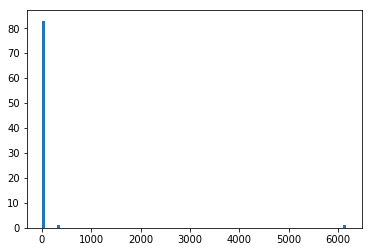

In [6]:
node_list = np.array(node_list)
node_list = node_list[node_list>1]
plt.hist(node_list, 100);
print(node_list)

In [7]:
from exp_data import exp_data


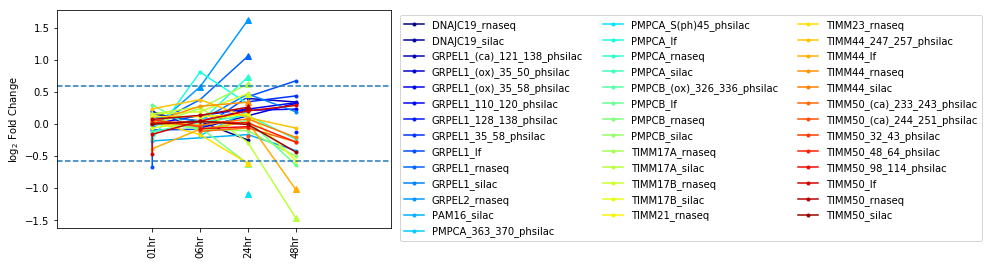

In [8]:
exp_data.plot_species(group_to_nodes['group1'], 'pmbca', image_format='png', plot_type='matplotlib');

In [9]:
from magine.enrichment.enrichr import Enrichr
e = Enrichr()

In [ ]:
df = e.run(group_to_nodes['group0'], 'Jensen_DISEASES')
df['sample_id'] = 1
print(df.shape)
df.filter_multi(p_value=0.05, inplace=True)
print(df.shape)
df.head(10)
df.remove_redundant(inplace=True)
df.dist_matrix(level='sample');

In [ ]:
display(df.head(10))

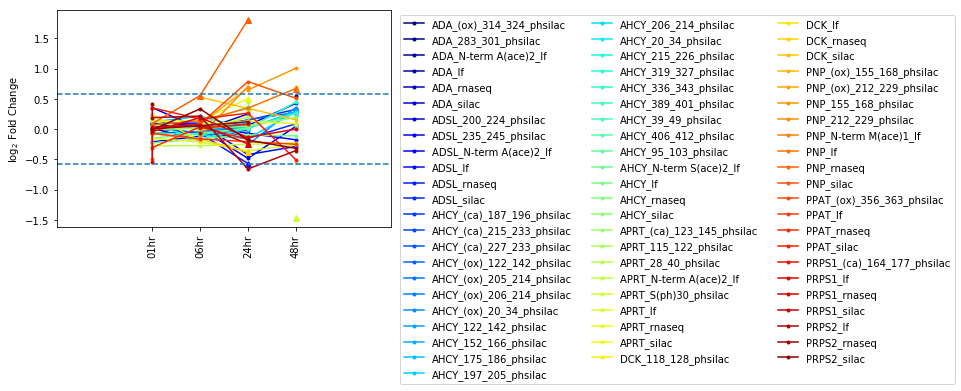

In [80]:
exp_data.plot_species(df.term_to_genes('purine_nucleoside_phosphorylase_deficiency'),
                      'pmbca', image_format='png', plot_type='matplotlib');

Number of rows went from 2 to 1


,term_name,rank,p_value,z_score,combined_score,adj_p_value,genes,n_genes,db,sample_id
0,mitochondrial protein import_hsa_r-hsa-1268020,1,4.024513e-32,-1.868814,135.097154,8.049025e-32,"DNAJC19,GRPEL1,GRPEL2,PAM16,PMPCA,PMPCB,TIMM17...",12,Reactome_2016,1


ValueError: The number of observations cannot be determined on an empty distance matrix.

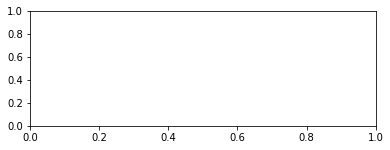

In [88]:
df2 = e.run(group_to_nodes['group1'], 'Reactome_2016')
df2['sample_id']= 1
df2.filter_multi(p_value=0.05, inplace=True)
df2.remove_redundant(inplace=True)
display(df2.head(10))
df2.dist_matrix(level='sample');

In [ ]:
ns = Subgraph(network=ddn)

In [87]:
sub = ns.paths_between_list(df.term_to_genes('purine_nucleoside_phosphorylase_deficiency'), max_length=2)
# sub = ns.expand_neighbors(sub, nodes=list(sub.nodes), upstream=True, downstream=True, max_dist=1)
# sub = ns.expand_neighbors(sub, nodes=list(sub.nodes), upstream=True, downstream=True, max_dist=3)
display_graph(sub)

In [83]:
sub = ns.paths_between_list(df2.term_to_genes('3-methylglutaconic_aciduria'))
sub = ns.expand_neighbors(sub, nodes=list(sub.nodes), upstream=True, downstream=True, max_dist=1)
# sub = ns.expand_neighbors(sub, nodes=list(sub.nodes), upstream=True, downstream=True, max_dist=3)
display_graph(sub)

set([u'TIMM23'])
None


AttributeError: 'NoneType' object has no attribute 'nodes'

In [84]:
sub = ns.neighbors('TIMM23')
display_graph(sub)
                   

# Group 1
MPTP complex is known to get activated under high ROS conditions and Ca2+ overload,13 leading to increase fluid uptake due to MPT; thus resulting in potential loss, organellar swelling and induction of cell death

https://www.nature.com/articles/cddis201472